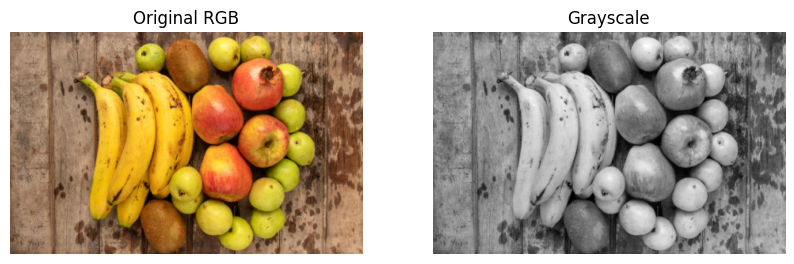

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read image (OpenCV reads as BGR)
img = cv2.imread('fruits.png')

# convert BGR -> RGB for correct display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# show images
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original RGB")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.show()


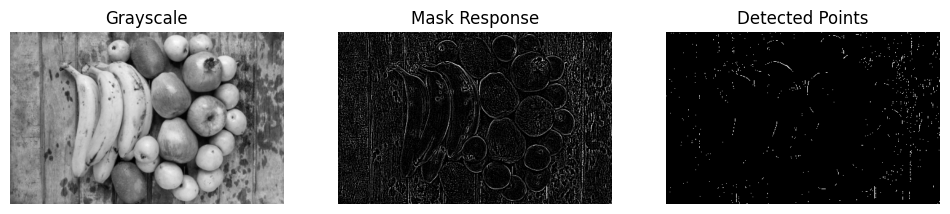

In [2]:
# define point detection kernel
kernel = np.array([[-1,-1,-1],
                   [-1, 8,-1],
                   [-1,-1,-1]])

# apply filter
point_response = cv2.filter2D(gray, -1, kernel)

# take absolute for visibility
point_response = np.abs(point_response)

# threshold to highlight strong points
_, points = cv2.threshold(point_response, 150, 255, cv2.THRESH_BINARY)

# display
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(point_response, cmap='gray')
plt.title("Mask Response")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(points, cmap='gray')
plt.title("Detected Points")
plt.axis('off')

plt.show()


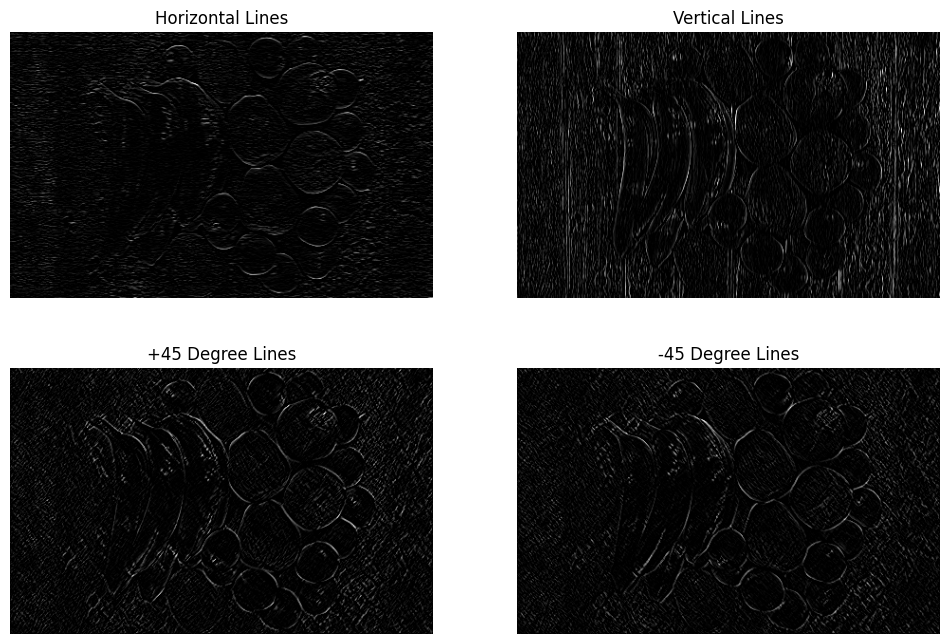

In [3]:
# define kernels
horizontal = np.array([[-1,-1,-1],
                       [ 2, 2, 2],
                       [-1,-1,-1]])

vertical = np.array([[-1, 2,-1],
                     [-1, 2,-1],
                     [-1, 2,-1]])

diag45 = np.array([[-1,-1, 2],
                   [-1, 2,-1],
                   [ 2,-1,-1]])

diag_45 = np.array([[ 2,-1,-1],
                    [-1, 2,-1],
                    [-1,-1, 2]])

# apply filters
h_resp = cv2.filter2D(gray, -1, horizontal)
v_resp = cv2.filter2D(gray, -1, vertical)
d45_resp = cv2.filter2D(gray, -1, diag45)
d_45_resp = cv2.filter2D(gray, -1, diag_45)

# absolute for display
h_resp = np.abs(h_resp)
v_resp = np.abs(v_resp)
d45_resp = np.abs(d45_resp)
d_45_resp = np.abs(d_45_resp)

# show
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(h_resp, cmap='gray')
plt.title("Horizontal Lines")
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(v_resp, cmap='gray')
plt.title("Vertical Lines")
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(d45_resp, cmap='gray')
plt.title("+45 Degree Lines")
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(d_45_resp, cmap='gray')
plt.title("-45 Degree Lines")
plt.axis('off')

plt.show()


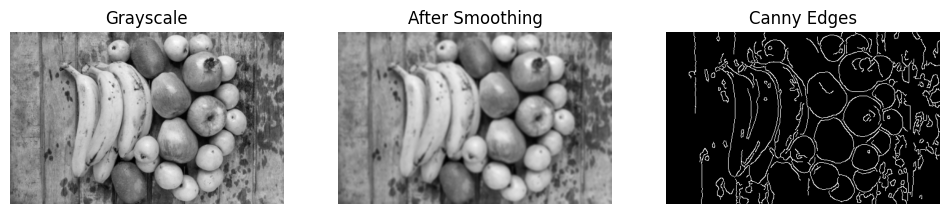

In [4]:
# optional blur for better result
blur = cv2.GaussianBlur(gray, (5,5), 1.4)

# apply canny
edges = cv2.Canny(blur, threshold1=50, threshold2=150)

# display
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(blur, cmap='gray')
plt.title("After Smoothing")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edges")
plt.axis('off')

plt.show()
